# Criando  o ECP Estadual

In [ ]:
import pandas as pd

# URLs dos arquivos no GitHub
urls = {
    'investimento': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B01-04-2025-04-51%5D.xls',
    'comercializacao': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B01-04-2025-04-50%5D.xls',
    'custeio': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B03-04-2025-01-36%5D.xls'
}

# Função para carregar e preparar os dados
def carregar_dados(nome, url):
    df = pd.read_excel(url)
    df.columns = df.columns.map(str)

    # Converter colunas de ano para números e tratar NaNs como 0
    anos = [col for col in df.columns if col.isdigit()]
    df[anos] = df[anos].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Garantir que o código do estado seja numérico
    df['Codigo'] = pd.to_numeric(df['Codigo'], errors='coerce')

    # Agrupar por código e somar valores por ano
    df_agrupado = df.groupby('Codigo')[anos].sum().reset_index()
    df_agrupado['Finalidade'] = nome
    return df_agrupado

# Carregar os 3 dataframes
dfs = [carregar_dados(nome, url) for nome, url in urls.items()]

# Concatenar e somar os valores das três finalidades por estado e ano
df_geral = pd.concat(dfs)
df_total = df_geral.groupby('Codigo').sum(numeric_only=True).reset_index()

# Mostrar o resultado
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.0f}'.format)  # formatação sem notação científica
display(df_total.head())

# Salvar como CSV opcionalmente
df_total.to_csv('credito_pecuaria_total_por_estado.csv', index=False)


,Codigo,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11,"51,396,404","58,980,653","79,355,695","149,189,221","166,710,219","221,415,662","392,210,615","237,998,915","486,389,817",...,"1,425,915,859","1,157,758,137","1,085,780,213","1,245,241,750","1,345,630,745","1,386,979,993","568,602,323","469,961,689","507,847,685","1,176,246,581"
1,12,"6,093,484","9,888,771","12,114,792","32,565,886","59,955,743","55,233,909","77,984,930","36,619,471","113,128,463",...,"182,029,167","135,119,998","134,220,542","127,308,016","168,853,219","156,478,273","63,207,677","82,777,060","55,463,248","206,427,194"
2,13,"18,123,482","17,545,042","16,126,374","86,729,093","133,959,812","41,297,159","30,169,178","19,309,200","57,555,141",...,"98,611,130","56,479,420","30,181,301","42,833,115","44,303,274","41,282,084","19,487,929","18,403,006","47,085,542","98,884,444"
3,14,"6,556,713","6,474","389,512","2,051,924","2,406,798","4,971,893","5,564,825","7,948,148","33,744,236",...,"94,978,268","52,212,649","59,767,875","50,628,364","57,011,034","88,646,581","22,148,226","24,604,554","41,341,426","56,920,539"
4,15,"82,598,610","149,514,872","258,249,664","428,328,265","362,565,024","324,070,906","458,892,655","256,465,510","564,033,721",...,"1,204,922,701","853,285,276","582,446,804","804,322,033","1,038,795,919","1,197,765,014","461,026,607","422,097,949","345,285,156","863,087,200"


In [ ]:
# Carrega preços deflacionados por ano (CEPEA, valores em R$/Kg deflacionados a 2010)
url_preco = 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/Pre%C3%A7o%20Deflacionado.xlsx'

# Leitura simples
df_preco = pd.read_excel(url_preco)
df_preco.columns = ['Ano', 'Preco_kg']
df_preco['Ano'] = df_preco['Ano'].astype(str)
df_preco['Preco_kg'] = pd.to_numeric(df_preco['Preco_kg'], errors='coerce')

display(df_preco.head(15))


,Ano,Preco_kg
0,1997,2
1,1998,6
2,1999,1
3,2000,3
4,2001,2
5,2002,2
6,2003,2
7,2004,3
8,2005,4
9,2006,7


In [ ]:
from urllib.request import urlopen
from io import BytesIO
import pandas as pd

# URL do arquivo com acento
url_kg_carcaca = 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/KG%20de%20carcaca%20por%20estado%20e%20ano.xlsx'

# Abrir usando BytesIO
with urlopen(url_kg_carcaca) as f:
    df_kg = pd.read_excel(BytesIO(f.read()))

# Dicionário para conversão de nome de estado em código IPEADATA
estado_to_codigo = {
    'Rondônia': 11, 'Acre': 12, 'Amazonas': 13, 'Roraima': 14, 'Pará': 15, 'Amapá': 16, 'Tocantins': 17,
    'Maranhão': 21, 'Piauí': 22, 'Ceará': 23, 'Rio Grande do Norte': 24, 'Paraíba': 25, 'Pernambuco': 26,
    'Alagoas': 27, 'Sergipe': 28, 'Bahia': 29, 'Minas Gerais': 31, 'Espírito Santo': 32, 'Rio de Janeiro': 33,
    'São Paulo': 35, 'Paraná': 41, 'Santa Catarina': 42, 'Rio Grande do Sul': 43,
    'Mato Grosso do Sul': 50, 'Mato Grosso': 51, 'Goiás': 52, 'Distrito Federal': 53
}

# Mapeia a primeira coluna para o código do estado
df_kg['Codigo'] = df_kg.iloc[:, 0].map(estado_to_codigo)

# Seleciona apenas as colunas com código e anos
colunas_anos = [col for col in df_kg.columns if str(col).isdigit()]
df_kg_final = df_kg[['Codigo'] + colunas_anos]

# Limpa e formata
df_kg_final = df_kg_final.dropna(subset=['Codigo'])
df_kg_final['Codigo'] = df_kg_final['Codigo'].astype(int)
df_kg_final[colunas_anos] = df_kg_final[colunas_anos].apply(pd.to_numeric, errors='coerce').fillna(0)

# Visualização
df_kg_final.head(10)


,Codigo,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11,0,0,0,0,0,0,0,0,13079588,...,0,9951137,15312451,15117006,14206537,13459998,13269714,8976384,33527486,60406314
1,12,0,2887131,13440764,16359081,22438577,26779576,31051089,28431450,24704230,...,28541780,26035233,25988859,25119225,23926059,22987228,21784721,19937794,21385955,25518933
2,13,0,0,0,0,0,0,0,0,0,...,32008400,33917499,38411389,39878046,35164783,33193124,27853788,20778169,19071817,20296458
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,19036787,45899931,51579590,31914604,25945672,28980428,49445344,51821104,41821161,...,103670172,97514628,96300723,95409934,109763459,97661531,67324987,66839284,68161410,84262150
5,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17,0,0,0,0,0,0,0,31085992,23933663,...,3804559,12950887,10909301,12110077,15616236,15652874,12411273,9984824,12162499,12619009
7,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3108938,4390689,7122087,10799563,14514796
8,22,10574926,10812781,10265079,10320543,10290446,8953285,9093717,7705426,6769773,...,0,0,0,0,0,0,0,0,0,0
9,23,33388858,33345205,30973542,29448595,27399102,25620846,21297912,19372397,20332623,...,14861905,13527555,11179923,10444536,9820960,8496083,0,2486644,5907883,0


In [ ]:
# URL do GitHub
url_vpleite = 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/VPLeite_por_estado_e_ano.xlsx'

# Lê sem cabeçalho (porque os anos foram lidos como dados)
df_raw = pd.read_excel(url_vpleite, header=None)

# Extrai a primeira coluna como sigla do estado
siglas = df_raw.iloc[:, 0]

# Os dados começam na segunda coluna (valores monetários por ano)
dados = df_raw.iloc[:, 1:].copy()

# Define os anos manualmente (1997 a 2023)
anos = list(range(1997, 2024))
dados.columns = anos

# Adiciona a coluna com siglas
dados.insert(0, 'Sigla', siglas)

# Mapeia sigla para código IPEADATA
sigla_to_codigo = {
    'RO': 11, 'AC': 12, 'AM': 13, 'RR': 14, 'PA': 15, 'AP': 16, 'TO': 17,
    'MA': 21, 'PI': 22, 'CE': 23, 'RN': 24, 'PB': 25, 'PE': 26, 'AL': 27, 'SE': 28, 'BA': 29,
    'MG': 31, 'ES': 32, 'RJ': 33, 'SP': 35,
    'PR': 41, 'SC': 42, 'RS': 43,
    'MS': 50, 'MT': 51, 'GO': 52, 'DF': 53
}
dados['Codigo'] = dados['Sigla'].map(sigla_to_codigo)

# Estrutura final: Codigo + anos
df_leite_final = dados[['Codigo'] + anos]
df_leite_final = df_leite_final.dropna(subset=['Codigo'])
df_leite_final['Codigo'] = df_leite_final['Codigo'].astype(int)
df_leite_final[anos] = df_leite_final[anos].apply(pd.to_numeric, errors='coerce').fillna(0)

display(df_leite_final.head(40))


,Codigo,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,12,"25,545","27,663","28,987","35,629","61,446","69,113","70,085","87,773","67,815",...,"36,153","38,013","38,411","31,162","28,420","26,277","25,448","23,945","24,994","25,879"
2,27,"222,459","185,460","167,631","150,258","185,458","177,279","177,308","180,143","154,375",...,"225,037","272,301","354,788","384,443","374,294","400,413","504,351","723,794","583,791","611,306"
3,13,"55,313","55,666","55,194","59,190","61,498","65,534","56,014","54,893","53,123",...,"55,736","49,591","44,249","38,001","40,626","36,466","36,553","35,841","41,401","44,159"
4,16,"3,909","3,582","3,664","4,244","3,529","3,178","2,648","2,970","3,413",...,"15,393","7,014","6,757","6,174","5,731","5,950","6,392","6,273","6,117","6,765"
5,29,"605,466","563,309","538,425","579,185","545,286","588,232","589,184","666,642","647,896",...,"941,360","755,767","630,015","607,457","650,402","691,368","874,830","979,146","1,032,043","983,930"
6,23,"426,635","336,101","314,026","298,654","286,417","329,068","344,209","364,872","366,421",...,"428,364","437,270","471,286","490,603","565,395","571,471","749,310","862,159","999,003","1,029,076"
7,53,"16,616","17,785","21,864","28,694","24,428","24,003","23,535","28,845","25,059",...,"24,878","19,064","20,155","18,633","21,529","21,933","23,173","29,709","30,811","36,858"
8,32,"223,885","200,354","210,675","210,679","203,764","227,113","242,835","275,243","271,263",...,"353,160","320,314","260,586","264,026","290,735","299,122","346,522","344,478","346,900","356,347"
9,52,"944,458","956,737","1,046,399","1,216,003","1,215,960","1,482,130","1,541,228","1,663,163","1,584,593",...,"2,482,171","2,198,192","2,000,632","1,944,855","2,046,804","2,151,296","2,489,946","2,634,955","2,850,086","2,753,847"
10,21,"143,626","136,996","147,038","153,224","129,004","496,018","194,139","240,747","257,306",...,"297,392","284,293","275,875","277,406","264,407","249,886","254,512","268,973","316,731","345,293"


## ECP Estadual

In [ ]:
# 1. Transformar df_total em formato longo para o crédito
credito_long = df_total.melt(id_vars='Codigo', var_name='Ano', value_name='Credito')
credito_long['Ano'] = credito_long['Ano'].astype(str)
credito_long['Credito'] = pd.to_numeric(credito_long['Credito'], errors='coerce').fillna(0)

# 2. Transformar df_kg_final em formato longo
kg_long = df_kg_final.melt(id_vars='Codigo', var_name='Ano', value_name='Kg_Carcaca')
kg_long['Ano'] = kg_long['Ano'].astype(str)

# 3. Transformar df_leite_final em formato longo
vp_leite_long = df_leite_final.melt(id_vars='Codigo', var_name='Ano', value_name='VPLeite')
vp_leite_long['Ano'] = vp_leite_long['Ano'].astype(str)

# 4. Carregar Preço Deflacionado
url_preco = 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/Pre%C3%A7o%20Deflacionado.xlsx'
df_preco = pd.read_excel(url_preco)
df_preco['Ano'] = df_preco['Data'].astype(str)
df_preco = df_preco.rename(columns={'Preço deflacionado - R$/Kg': 'Preco_Kg'})
df_preco['Preco_Kg'] = pd.to_numeric(df_preco['Preco_Kg'], errors='coerce').fillna(0)

# 5. Merge de todas as bases
df_merge = kg_long.merge(vp_leite_long, on=['Codigo', 'Ano'])
df_merge = df_merge.merge(credito_long, on=['Codigo', 'Ano'])
df_merge = df_merge.merge(df_preco[['Ano', 'Preco_Kg']], on='Ano', how='left')

# 6. Cálculo do ECP
df_merge['ECP'] = ((df_merge['Preco_Kg'] * df_merge['Kg_Carcaca']) + df_merge['VPLeite']) / df_merge['Credito']
df_merge['ECP'] = df_merge['ECP'].replace([float('inf'), -float('inf')], pd.NA).fillna(0)

# 7. Pivot final com Código na linha e Anos nas colunas
df_ecp = df_merge.pivot(index='Codigo', columns='Ano', values='ECP').reset_index()

# 8. Exibir resultado
pd.set_option('display.float_format', '{:,.4f}'.format)
display(df_ecp.head())

# 9. Exportar resultado do ECP para arquivo Excel (.xlsx)
df_ecp.to_excel('indice_ECP_por_estado_ano.xlsx', index=False)



Ano,Codigo,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11,0.0028,0.0029,0.0027,0.0012,0.0010,0.0011,0.0007,0.0015,0.1023,...,0.0004,0.0465,0.1354,0.2255,0.1612,0.1447,0.4611,0.2300,1.4286,1.1159
1,12,0.0042,1.8977,1.6502,1.3239,0.8146,0.7314,0.9582,2.4154,0.8255,...,1.2174,1.0349,1.8548,3.6583,2.1575,2.1848,6.7955,2.8866,8.3375,2.6852
2,13,0.0031,0.0032,0.0034,0.0007,0.0005,0.0016,0.0019,0.0028,0.0009,...,2.5202,3.2256,12.1907,17.2612,12.0856,11.9584,28.1812,13.5319,8.7587,4.4586
3,14,0.0026,2.2791,0.0520,0.0093,0.0039,0.0017,0.0015,0.0010,0.0002,...,0.0001,0.0003,0.0003,0.0003,0.0002,0.0002,0.0007,0.0007,0.0004,0.0003
4,15,0.4677,1.9941,0.2977,0.1969,0.1564,0.1358,0.2599,0.6296,0.2809,...,0.6682,0.6141,1.5842,2.1997,1.6091,1.2129,2.8801,1.8986,4.2696,2.1211


In [ ]:
# Dicionário de códigos para nomes dos estados (IPEADATA)
codigo_to_estado = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Adicionar coluna com nomes dos estados
df_ecp['Estado'] = df_ecp['Codigo'].map(codigo_to_estado)

# Reorganizar colunas: colocar Estado logo após Código
colunas = ['Codigo', 'Estado'] + [col for col in df_ecp.columns if col not in ['Codigo', 'Estado']]
df_ecp = df_ecp[colunas]

# Visualizar
display(df_ecp.head())

# Exportar com nomes
df_ecp.to_excel('indice_ECP_com_estados.xlsx', index=False)


Ano,Codigo,Estado,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11,Rondônia,0.0028,0.0029,0.0027,0.0012,0.0010,0.0011,0.0007,0.0015,...,0.0004,0.0465,0.1354,0.2255,0.1612,0.1447,0.4611,0.2300,1.4286,1.1159
1,12,Acre,0.0042,1.8977,1.6502,1.3239,0.8146,0.7314,0.9582,2.4154,...,1.2174,1.0349,1.8548,3.6583,2.1575,2.1848,6.7955,2.8866,8.3375,2.6852
2,13,Amazonas,0.0031,0.0032,0.0034,0.0007,0.0005,0.0016,0.0019,0.0028,...,2.5202,3.2256,12.1907,17.2612,12.0856,11.9584,28.1812,13.5319,8.7587,4.4586
3,14,Roraima,0.0026,2.2791,0.0520,0.0093,0.0039,0.0017,0.0015,0.0010,...,0.0001,0.0003,0.0003,0.0003,0.0002,0.0002,0.0007,0.0007,0.0004,0.0003
4,15,Pará,0.4677,1.9941,0.2977,0.1969,0.1564,0.1358,0.2599,0.6296,...,0.6682,0.6141,1.5842,2.1997,1.6091,1.2129,2.8801,1.8986,4.2696,2.1211


# Plotando Mapa para primeira metade


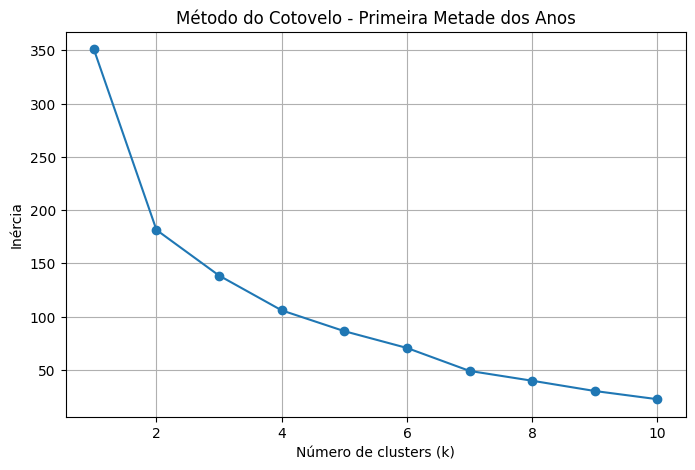

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Identificar colunas de anos (todas numéricas)
col_anos = [col for col in df_ecp.columns if col.isdigit()]
col_anos.sort()  # garantir ordem

# 2. Definir primeira metade dos anos (13 primeiros)
anos_primeira_metade = col_anos[:13]

# 3. Filtrar DataFrame com os anos + identificação
df_primeira = df_ecp[['Codigo', 'Estado'] + anos_primeira_metade].copy()

# 4. Padronizar os dados da primeira metade
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(df_primeira[anos_primeira_metade])

# 5. Método do Cotovelo
inercias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_padronizado)
    inercias.append(kmeans.inertia_)

# 6. Plotar gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Método do Cotovelo - Primeira Metade dos Anos')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


In [ ]:
# Aplicar K-means e ajustar rótulo para iniciar em 1
df_primeira['Grupo_KMeans'] = kmeans_final.fit_predict(X_padronizado) + 1

# Visualizar
display(df_primeira[['Codigo', 'Estado', 'Grupo_KMeans']])


Ano,Codigo,Estado,Grupo_KMeans
0,11,Rondônia,1
1,12,Acre,3
2,13,Amazonas,1
3,14,Roraima,1
4,15,Pará,2
5,16,Amapá,1
6,17,Tocantins,1
7,21,Maranhão,1
8,22,Piauí,2
9,23,Ceará,2


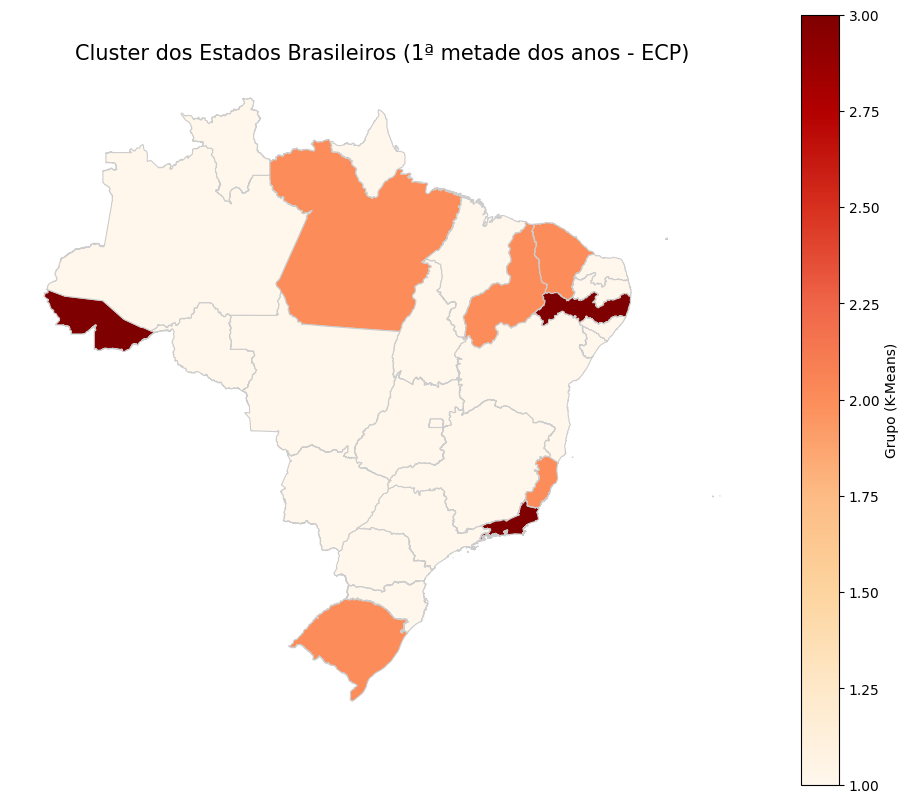

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar a malha estadual (shapefile)
gdf = gpd.read_file('/content/BR_UF_2023.shp')  # ajuste o caminho se diferente

# 2. Criar ou carregar o dataframe de clusters (já feito anteriormente com df_primeira)
# Certifique-se de que ele tem colunas 'Codigo' e 'Grupo_KMeans'

# 3. Unir a malha com os clusters pelo código do estado (CD_UF no shapefile)
gdf['Codigo'] = gdf['CD_UF'].astype(int)  # garantir o mesmo tipo
gdf_merge = gdf.merge(df_primeira[['Codigo', 'Grupo_KMeans']], on='Codigo', how='left')

# 4. Plotar o mapa com base no grupo do KMeans
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gdf_merge.plot(column='Grupo_KMeans',
               cmap='OrRd',            # tonalidade de vermelho crescente
               linewidth=0.8,
               edgecolor='0.8',
               legend=True,
               legend_kwds={'label': "Grupo (K-Means)"},
               ax=ax)

ax.set_title('Cluster dos Estados Brasileiros (1ª metade dos anos - ECP)', fontsize=15)
ax.axis('off')

plt.show()


#Plotando Mapa para segunda metade


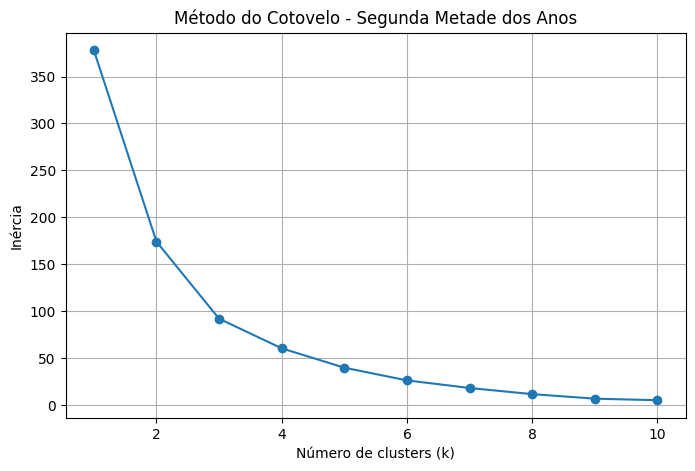

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Identificar colunas de anos (todas numéricas)
col_anos = [col for col in df_ecp.columns if col.isdigit()]
col_anos.sort()  # garantir ordem

# 2. Definir segunda metade dos anos (do 14º em diante)
anos_segunda_metade = col_anos[13:]  # de 13 em diante

# 3. Filtrar DataFrame com os anos + identificação
df_segunda = df_ecp[['Codigo', 'Estado'] + anos_segunda_metade].copy()

# 4. Padronizar os dados da segunda metade
scaler = StandardScaler()
X_padronizado_segunda = scaler.fit_transform(df_segunda[anos_segunda_metade])

# 5. Método do Cotovelo
inercias_segunda = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_padronizado_segunda)
    inercias_segunda.append(kmeans.inertia_)

# 6. Plotar gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inercias_segunda, marker='o')
plt.title('Método do Cotovelo - Segunda Metade dos Anos')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


In [ ]:
# Definir o número ideal de clusters (ajuste conforme o cotovelo)
k_ideal = 3  # substitua se necessário

# Aplicar K-means na segunda metade
kmeans_final_segunda = KMeans(n_clusters=k_ideal, random_state=0, n_init=10)
df_segunda['Grupo_KMeans'] = kmeans_final_segunda.fit_predict(X_padronizado_segunda) + 1  # ajusta rótulo para iniciar em 1

# Visualizar resultado
display(df_segunda[['Codigo', 'Estado', 'Grupo_KMeans']])


Ano,Codigo,Estado,Grupo_KMeans
0,11,Rondônia,1
1,12,Acre,3
2,13,Amazonas,2
3,14,Roraima,1
4,15,Pará,1
5,16,Amapá,1
6,17,Tocantins,1
7,21,Maranhão,1
8,22,Piauí,1
9,23,Ceará,1


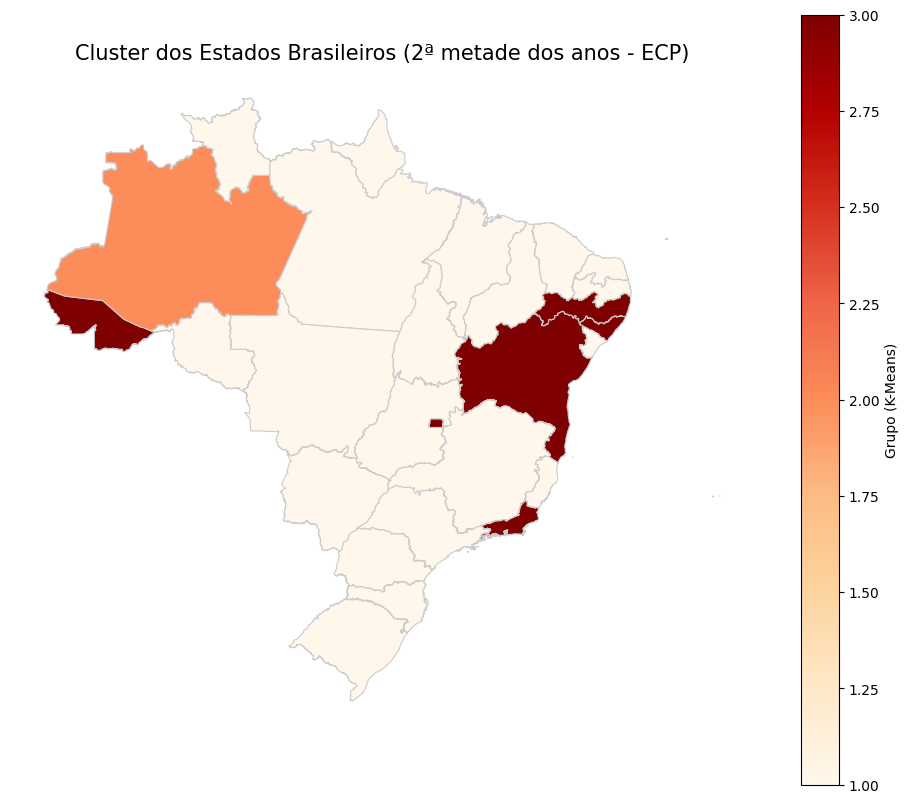

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 1. Carregar a malha estadual (shapefile)
gdf = gpd.read_file('/content/BR_UF_2023.shp')  # ajuste o caminho se necessário

# 2. Garantir que o código seja inteiro
gdf['Codigo'] = gdf['CD_UF'].astype(int)

# 3. Unir a malha com os clusters da segunda metade (df_segunda)
gdf_merge_segunda = gdf.merge(df_segunda[['Codigo', 'Grupo_KMeans']], on='Codigo', how='left')

# 4. Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gdf_merge_segunda.plot(column='Grupo_KMeans',
                       cmap='OrRd',
                       linewidth=0.8,
                       edgecolor='0.8',
                       legend=True,
                       legend_kwds={'label': "Grupo (K-Means)"},
                       ax=ax)

ax.set_title('Cluster dos Estados Brasileiros (2ª metade dos anos - ECP)', fontsize=15)
ax.axis('off')

plt.show()


Somando Demanda de crédito pecuário para construção da tabela 1

In [ ]:
import pandas as pd

# Estados e seus códigos IBGE
estados_interesse = {
    'Pará': 15,
    'Minas Gerais': 31,
    'Paraná': 41,
    'Santa Catarina': 42,
    'Rio Grande do Sul': 43
}

# Períodos de análise
periodos = {
    '1997-2005': [str(ano) for ano in range(1997, 2006)],
    '2006-2014': [str(ano) for ano in range(2006, 2015)],
    '2015-2023': [str(ano) for ano in range(2015, 2024)]
}

# URLs dos arquivos .xls hospedados no GitHub
urls = {
    'investimento': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B01-04-2025-04-51%5D.xls',
    'comercializacao': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B01-04-2025-04-50%5D.xls',
    'custeio': 'https://github.com/adirsonmfjr/-ndice-ECP/raw/main/ipeadata%5B03-04-2025-01-36%5D.xls'
}

# Função para carregar os dados
def carregar_dados(nome, url):
    df = pd.read_excel(url, engine='xlrd')
    df.columns = df.columns.map(str)
    anos = [col for col in df.columns if col.isdigit()]
    df[anos] = df[anos].apply(pd.to_numeric, errors='coerce').fillna(0)
    df['Codigo'] = pd.to_numeric(df['Codigo'], errors='coerce')
    df_agrupado = df.groupby('Codigo')[anos].sum().reset_index()
    df_agrupado['Finalidade'] = nome
    return df_agrupado

# Carregar e concatenar os três arquivos
dfs = [carregar_dados(nome, url) for nome, url in urls.items()]
df_geral = pd.concat(dfs)

# Filtrar apenas os estados desejados
df_filtrado = df_geral[df_geral['Codigo'].isin(estados_interesse.values())]

# Calcular a soma por estado e por período
dados_tabela = []
for estado, codigo in estados_interesse.items():
    linha = {'Estado': estado}
    for periodo, anos in periodos.items():
        soma = df_filtrado[df_filtrado['Codigo'] == codigo][anos].sum().sum()
        linha[periodo] = soma
    dados_tabela.append(linha)

# Criar DataFrame final com os resultados
df_resultado = pd.DataFrame(dados_tabela)

# Exibir
pd.set_option('display.float_format', '{:,.0f}'.format)
display(df_resultado)

# Opcional: salvar como CSV
# df_resultado.to_csv("estoque_pecuario_demandado_por_estado_e_periodo.csv", index=False)
